In [1]:
# Necessary Imports
import matplotlib.pyplot as plt
import tensorflow as tf

2023-06-24 14:49:47.905338: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-24 14:49:48.425324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Loading the data from directory

# Used to train the model
train = tf.keras.utils.image_dataset_from_directory(
    '3000_dataset', 
    labels='inferred', 
    label_mode="int", 
    color_mode='grayscale', 
    subset="training", 
    validation_split=0.2, 
    seed=42,
    image_size=(64, 64),
)

# Used to test the model
test = tf.keras.utils.image_dataset_from_directory(
    '3000_dataset', 
    labels='inferred', 
    label_mode="int", 
    color_mode='grayscale', 
    subset="validation", 
    validation_split=0.2, 
    seed=42,
    image_size=(64, 64),
)

# Data from another source
# used to train the model to verify how univeral it is
test2 = tf.keras.utils.image_dataset_from_directory(
    'first_dataset', 
    labels='inferred', 
    label_mode="int", 
    color_mode='grayscale',
    seed=42,
    image_size=(64, 64),
)

Found 3000 files belonging to 2 classes.


Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.
Found 253 files belonging to 2 classes.


2023-06-24 14:49:49.181510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 14:49:49.196921: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-24 14:49:49.197098: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

2023-06-24 14:49:49.761667: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2400]
	 [[{{node Placeholder/_0}}]]
2023-06-24 14:49:49.761881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2400]
	 [[{{node Placeholder/_0}}]]


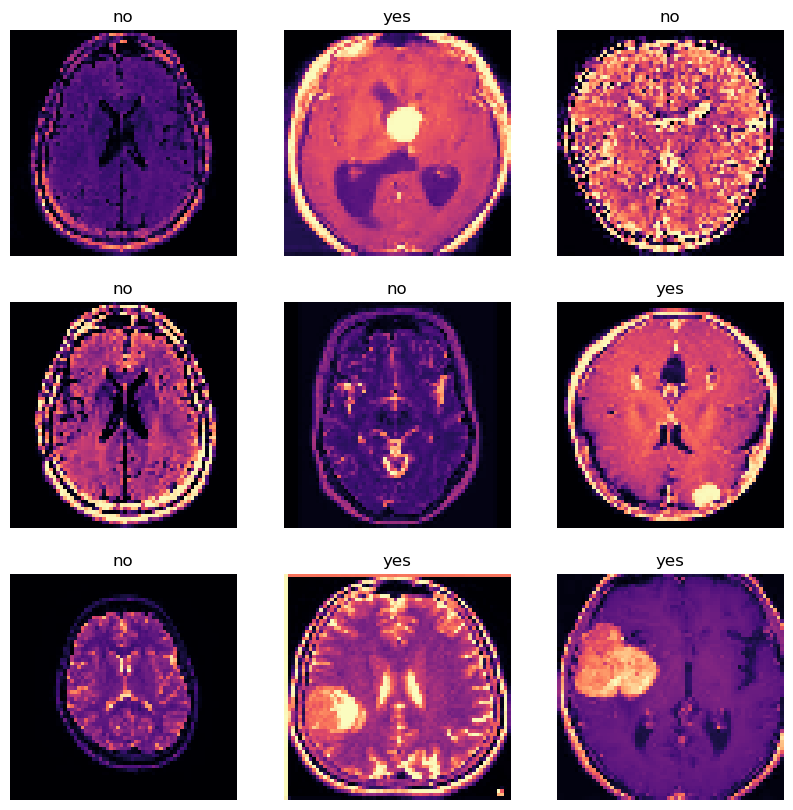

In [3]:
class_names = train.class_names

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap="magma")
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [11]:
# Creating the model
model = tf.keras.Sequential([
    # Input tensors are from range 1 to 255 so need rescaling.
    tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 1)),
    # 3 Convolutional + MaxPool Layers
    tf.keras.layers.Conv2D(filters = 10, kernel_size=(5, 5)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters = 90, kernel_size=(5, 5)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters = 50, kernel_size=(5, 5)),
    tf.keras.layers.MaxPooling2D(4, 4),
    # Flatening and Clasifying the Data.
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Using Adam Optimizer LR has to be very small for the model to perform < 0.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00008)
metrics = ["accuracy", tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]


model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=metrics)

model.build()
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 10)        260       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 90)        22590     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 90)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 50)         

In [12]:
# Fitting the model
model.fit(train, epochs=110)

Epoch 1/110
75/75 [==============================] - 1s 4ms/step - loss: 0.6462 - accuracy: 0.6433 - auc_2: 0.7299 - precision_1: 0.6046 - recall_1: 0.8201
Epoch 2/110
75/75 [==============================] - 0s 4ms/step - loss: 0.5470 - accuracy: 0.7592 - auc_2: 0.8314 - precision_1: 0.7280 - recall_1: 0.8243
Epoch 3/110
75/75 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7812 - auc_2: 0.8591 - precision_1: 0.7581 - recall_1: 0.8234
Epoch 4/110
75/75 [==============================] - 0s 4ms/step - loss: 0.4476 - accuracy: 0.7979 - auc_2: 0.8790 - precision_1: 0.7722 - recall_1: 0.8427
Epoch 5/110
75/75 [==============================] - 0s 3ms/step - loss: 0.4272 - accuracy: 0.8096 - auc_2: 0.8900 - precision_1: 0.7943 - recall_1: 0.8335
Epoch 6/110
75/75 [==============================] - 1s 9ms/step - loss: 0.3981 - accuracy: 0.8417 - auc_2: 0.9086 - precision_1: 0.8201 - recall_1: 0.8736
Epoch 7/110
75/75 [==============================] - 0s 3ms/step

In [13]:
# Model Evaluation
model.evaluate(test)
model.evaluate(test2)

8/8 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9842 - auc_2: 0.9860 - precision_1: 0.9748 - recall_1: 1.0000


[0.09890925884246826,
 0.9841897487640381,
 0.986043393611908,
 0.9748427867889404,
 1.0]

In [16]:
# Loading the best performing model
model_loaded = tf.keras.models.load_model("Model 9867 Accuracy")

In [17]:
# Best Model Evaluation
model_loaded.evaluate(test)
model_loaded.evaluate(test2)

8/8 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.9842 - auc_2: 0.9860 - precision_1: 0.9748 - recall_1: 1.0000


[0.09890925884246826,
 0.9841897487640381,
 0.986043393611908,
 0.9748427867889404,
 1.0]